### Conjuntos de dados &amp; NumPy - csv's, funções, numpy e distribuições

#### Executa a célula abaixo para carregar os pacotes exigidos

In [1]:
import numpy as np
import scipy.stats as stats
import csv
import seaborn as sns
import pandas as pd

# Este é necessário no jupyter notebook
#%matplotlib inline

### Dados de vendas

#### Para este laboratório, vamos usar uma versão resumida de um conjunto de dados que contém informações sobre as vendas de estabelecimentos econômicos que serão analisados em detalhes posteriormente.

#### O csv tem cerca de 200 linhas de dados e 4 colunas. O caminho especificado do csv ```sales_info.csv``` supõe que está no mesmo diretório que o presente notebook. Caso o tenha baixado em outro diretório, você deverá fazer referência de forma relativa ou absoluta (buscar linux path examples relativa/absoluta no Google).

#### Exercício 1 -  Use o método ```read_csv``` da biblioteca Pandas para criar um dataframe a partir do arquivo. 

In [41]:
dados = pd.read_csv('sales_info.csv')
dados.head()

,volume_sold,2015_margin,2015_q1_sales,2016_q1_sales
0,18.420760,93.802281,337166.53,337804.05
1,4.776510,21.082425,22351.86,21736.63
2,16.602401,93.612494,277764.46,306942.27
3,4.296111,16.824704,16805.11,9307.75
4,8.156023,35.011457,54411.42,58939.90


#### Exercício 2 -  Transforme a série em um array de numpy, use o método ```np.array()``` para transformar a série ```volume_sold``` do dataframe gerado em um array de numpy

In [4]:
#Passei como argumento da função np.array() a coluna volume_sold dos dados
#que selecionados com essa sintaxe retorna um objeto de tipo Series

volume_sold = np.array(dados['volume_sold'])

#### Exercício 3 - Imprima os 10 primeiros itens da coluna ```volume_sold``` usando o ```array slicing```.

In [9]:
#Coluna volume_sold
print(dados['volume_sold'].head(10))

print('\n')

#Array com valores de volume_sold
print(volume_sold[:10])

0    18.420760
1     4.776510
2    16.602401
3     4.296111
4     8.156023
5     5.005122
6    14.606750
7     4.456466
8     5.047530
9     5.388070
Name: volume_sold, dtype: float64


[18.42076049  4.77650992 16.60240061  4.2961115   8.15602328  5.00512243
 14.60675     4.45646649  5.04752965  5.38807024]


#### Exercício 4 - Imprimir o tipo de dado do array, utilize a propriedade dos arrays dtype para conhecer o tipo de dado do array

In [10]:
volume_sold.dtype

dtype('float64')

#### Exercício 5 - Escreva uma função para imprimir as informações resumidas

#### A função deve:

- Usar dois parâmetros: o nome da coluna e os dados associados a essa coluna
- Imprimir as informações, indicando claramente de que se trata cada item impresso:
    1. Imprimir o nome da coluna
    2. Imprimir a média dos dados usando ```np.mean()```
    3. Imprimir a mediana dos dados usando ```np.median()``` 
    4. Imprimir a moda dos dados arredondados usando ```stats.mode()```
    5. Imprimir a variância dos dados usando ```np.var()```
    6. Imprimir o desvio padrão dos dados usando ```np.std()```

In [29]:
def medidas_estatisticas(conjunto_dados, coluna):
  
  valores = np.array(conjunto_dados[coluna])
  
  print(f'Nome da coluna: {coluna}')
  print(f'Media: {np.mean(valores):.2f}')
  print(f'Mediana: {np.median(valores):.2f}')
  print(f'Moda: {stats.mode(valores)[0]}')
  print(f'Variância: {np.var(valores):.2f}')
  print(f'Desvio padrão: {np.std(valores):.2f}')

#### Exercício 5a - Usando a função definida, imprimir as medidas para ```volume_sold```

In [31]:
medidas_estatisticas(dados, 'volume_sold')

Nome da coluna: volume_sold
Media: 10.02
Mediana: 8.17
Moda: [2.7946315]
Variância: 84.13
Desvio padrão: 9.17


#### Exercício 5b - Usando a função definida, imprimir as medidas para ```2015_margin```.

In [32]:
medidas_estatisticas(dados, '2015_margin')

Nome da coluna: 2015_margin
Media: 46.86
Mediana: 36.56
Moda: [11.9961177]
Variância: 2016.06
Desvio padrão: 44.90


#### Exercício 5c - Usando a função definida, imprimir as medidas para ```2015_q1_sales```.

In [33]:
medidas_estatisticas(dados, '2015_q1_sales')

Nome da coluna: 2015_q1_sales
Media: 154631.67
Mediana: 104199.41
Moda: [4151.93]
Variância: 47430301462.33
Desvio padrão: 217784.99


#### Exercício 5d - Usando a função definida, imprimir as medidas para ```2016_q1_sales```.

In [34]:
medidas_estatisticas(dados, '2016_q1_sales')

Nome da coluna: 2016_q1_sales
Media: 154699.18
Mediana: 103207.20
Moda: [3536.14]
Variância: 47139411653.45
Desvio padrão: 217116.12


#### Exercício 6 - Representar as distribuições graficamente.

#### Mais abaixo, fornecemos uma função para representação gráfica chamada ```distribution_plotter()```. Ela usa dois parâmetros: o nome da coluna e os dados associados a essa coluna.

#### Em células individuais, representar graficamente as distribuições de cada uma das 4 colunas. Os dados são assimétricos ou simétricos?

In [35]:
def distribution_plotter(column, data):
    sns.set(rc = {"figure.figsize": (10, 7)})
    sns.set_style("white")
    dist = sns.distplot(data, hist_kws = {'alpha':0.2}, kde_kws = {'linewidth':5})
    dist.set_title('Distribuição de ' + column + '\n', fontsize = 16)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


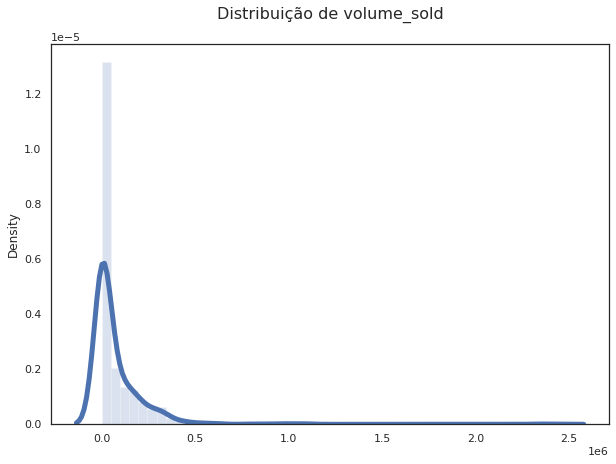

In [36]:
distribution_plotter(data= dados, column= 'volume_sold')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


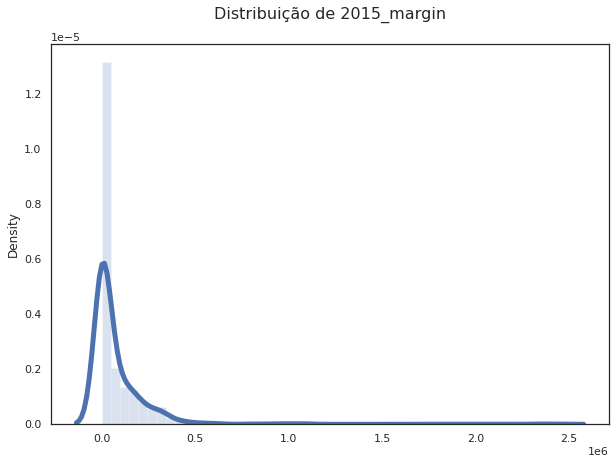

In [37]:
distribution_plotter(data= dados, column= '2015_margin')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


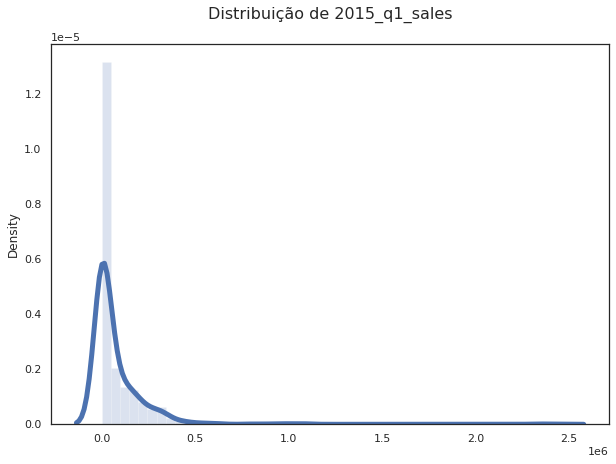

In [38]:
distribution_plotter(data= dados, column= '2015_q1_sales')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


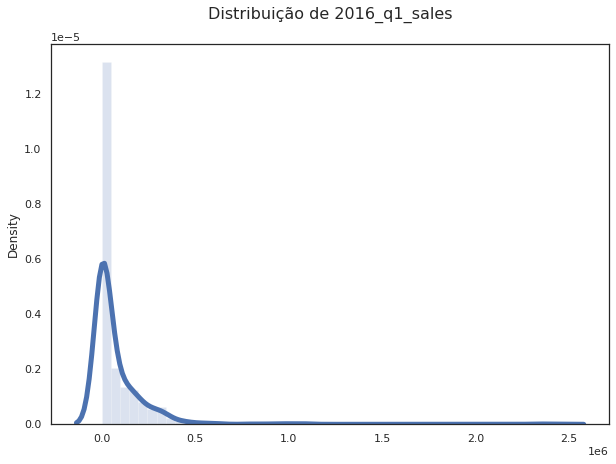

In [39]:
distribution_plotter(data= dados, column= '2016_q1_sales')

Temos distribuições com assimetrias à esquerda. 
Isso significa que a maioria dos dados nas quatro variáveis estão situados abaixo da media.

Isso pode nos indicar que existem produtos ou estabelecimentos incomuns que elevam a media das vendas, mas que as vendas estão, na verdade, baixas na maioria dos estabelecimentos contidos nos dados.